## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [126]:
# student 1: Zeev 9735
# student 2:
# student 3:
# student 4:
# (optional) student 5:
# (optional) student 6:

## Part 2 - Experiments


### Python libraries import

In [127]:
import numpy as np
import pandas as pd
# --------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------
# show several outputs in one cell. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import scikit learn
import sklearn

# --------------------------------------
from sklearn.decomposition import PCA
# --------------------------------------
from sklearn.metrics import accuracy_score, confusion_matrix
# --------------------------------------
import warnings

# --------------------------------------
warnings.simplefilter("ignore")
%matplotlib inline
# --------------------------------------

### Data upload
In this section we will upload the given traning and test data sets regarding the breast cancer from Data folder to pandas Data Frame

In [128]:
DATA_DIR = './Data/'

raw_train_set = pd.read_csv(filepath_or_buffer=DATA_DIR+'cancer_train.csv')
raw_test_set = pd.read_csv(filepath_or_buffer=DATA_DIR+'cancer_test.csv')

print("Train set:")
raw_train_set.head()

print("Test set:")
raw_test_set.head()

Train set:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


Test set:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960,1
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,0
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,1
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834,1


### EDA - Exploratory Data Analysis
In this section we will explore the raw data we uploaded in order to evalute the quality of the data

#### Now we will check for nulls, Nans and dupliates in the train set and test sets

In [129]:
print ("Raw Train set")
raw_train_set.info()
print ("Raw Test set")
raw_test_set.info()

Raw Train set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              455 non-null    float64
 1   mean texture             455 non-null    float64
 2   mean perimeter           455 non-null    float64
 3   mean area                455 non-null    float64
 4   mean smoothness          455 non-null    float64
 5   mean compactness         455 non-null    float64
 6   mean concavity           455 non-null    float64
 7   mean concave points      455 non-null    float64
 8   mean symmetry            455 non-null    float64
 9   mean fractal dimension   455 non-null    float64
 10  radius error             455 non-null    float64
 11  texture error            455 non-null    float64
 12  perimeter error          455 non-null    float64
 13  area error               455 non-null    float64
 14  smoothness e

It is a bit hard to see if there is nulls using the info() method 🤦‍♂️.
<p>Let's make it a littel comact by building a utility function:</p>

In [130]:
# A utillity function that will return information about duplicates, nulls and NANs

def data_frame_nulls_nans_duplicates(data_frame: pd.DataFrame):
    nans = 0
    nulls = 0
    dupliactes = 0

    for col in data_frame.columns:
        nans+= data_frame[col].isna().sum()
        nulls+= data_frame[col].isnull().sum()

    dupliactes = data_frame.duplicated().sum()

    print('This data frame contains: \n Nans (not a number): {nans}\n Nulls: {nulls}\n Duplicates: {dupliactes}'.format(nans=nans, nulls=nulls, dupliactes=dupliactes))

    return nans, nulls, dupliactes
# Train set

print("Train set:")
data_frame_nulls_nans_duplicates(raw_train_set)

# # Test set

print("\nTest set:")
data_frame_nulls_nans_duplicates(raw_test_set)



Train set:
This data frame contains: 
 Nans (not a number): 0
 Nulls: 0
 Duplicates: 0


(0, 0, 0)


Test set:
This data frame contains: 
 Nans (not a number): 0
 Nulls: 0
 Duplicates: 0


(0, 0, 0)

Those are good resoults it means that no data cleaning is neede 🥳
<p>But before we move forward let's pay attention to the larga amount of the features.... wen need to explore thr data further and detect if there are highly coorelated featurs</p>

Now we will build utility function that will visualize the correlation:

In [131]:
def correlation_tri_heatmap(data_frame: pd.DataFrame):
    size = data_frame.shape[1]
    corr = data_frame.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(size, size))
    sns.heatmap(corr, cmap="Blues", annot=True, mask=mask)

Invoke this function on the raw train data set

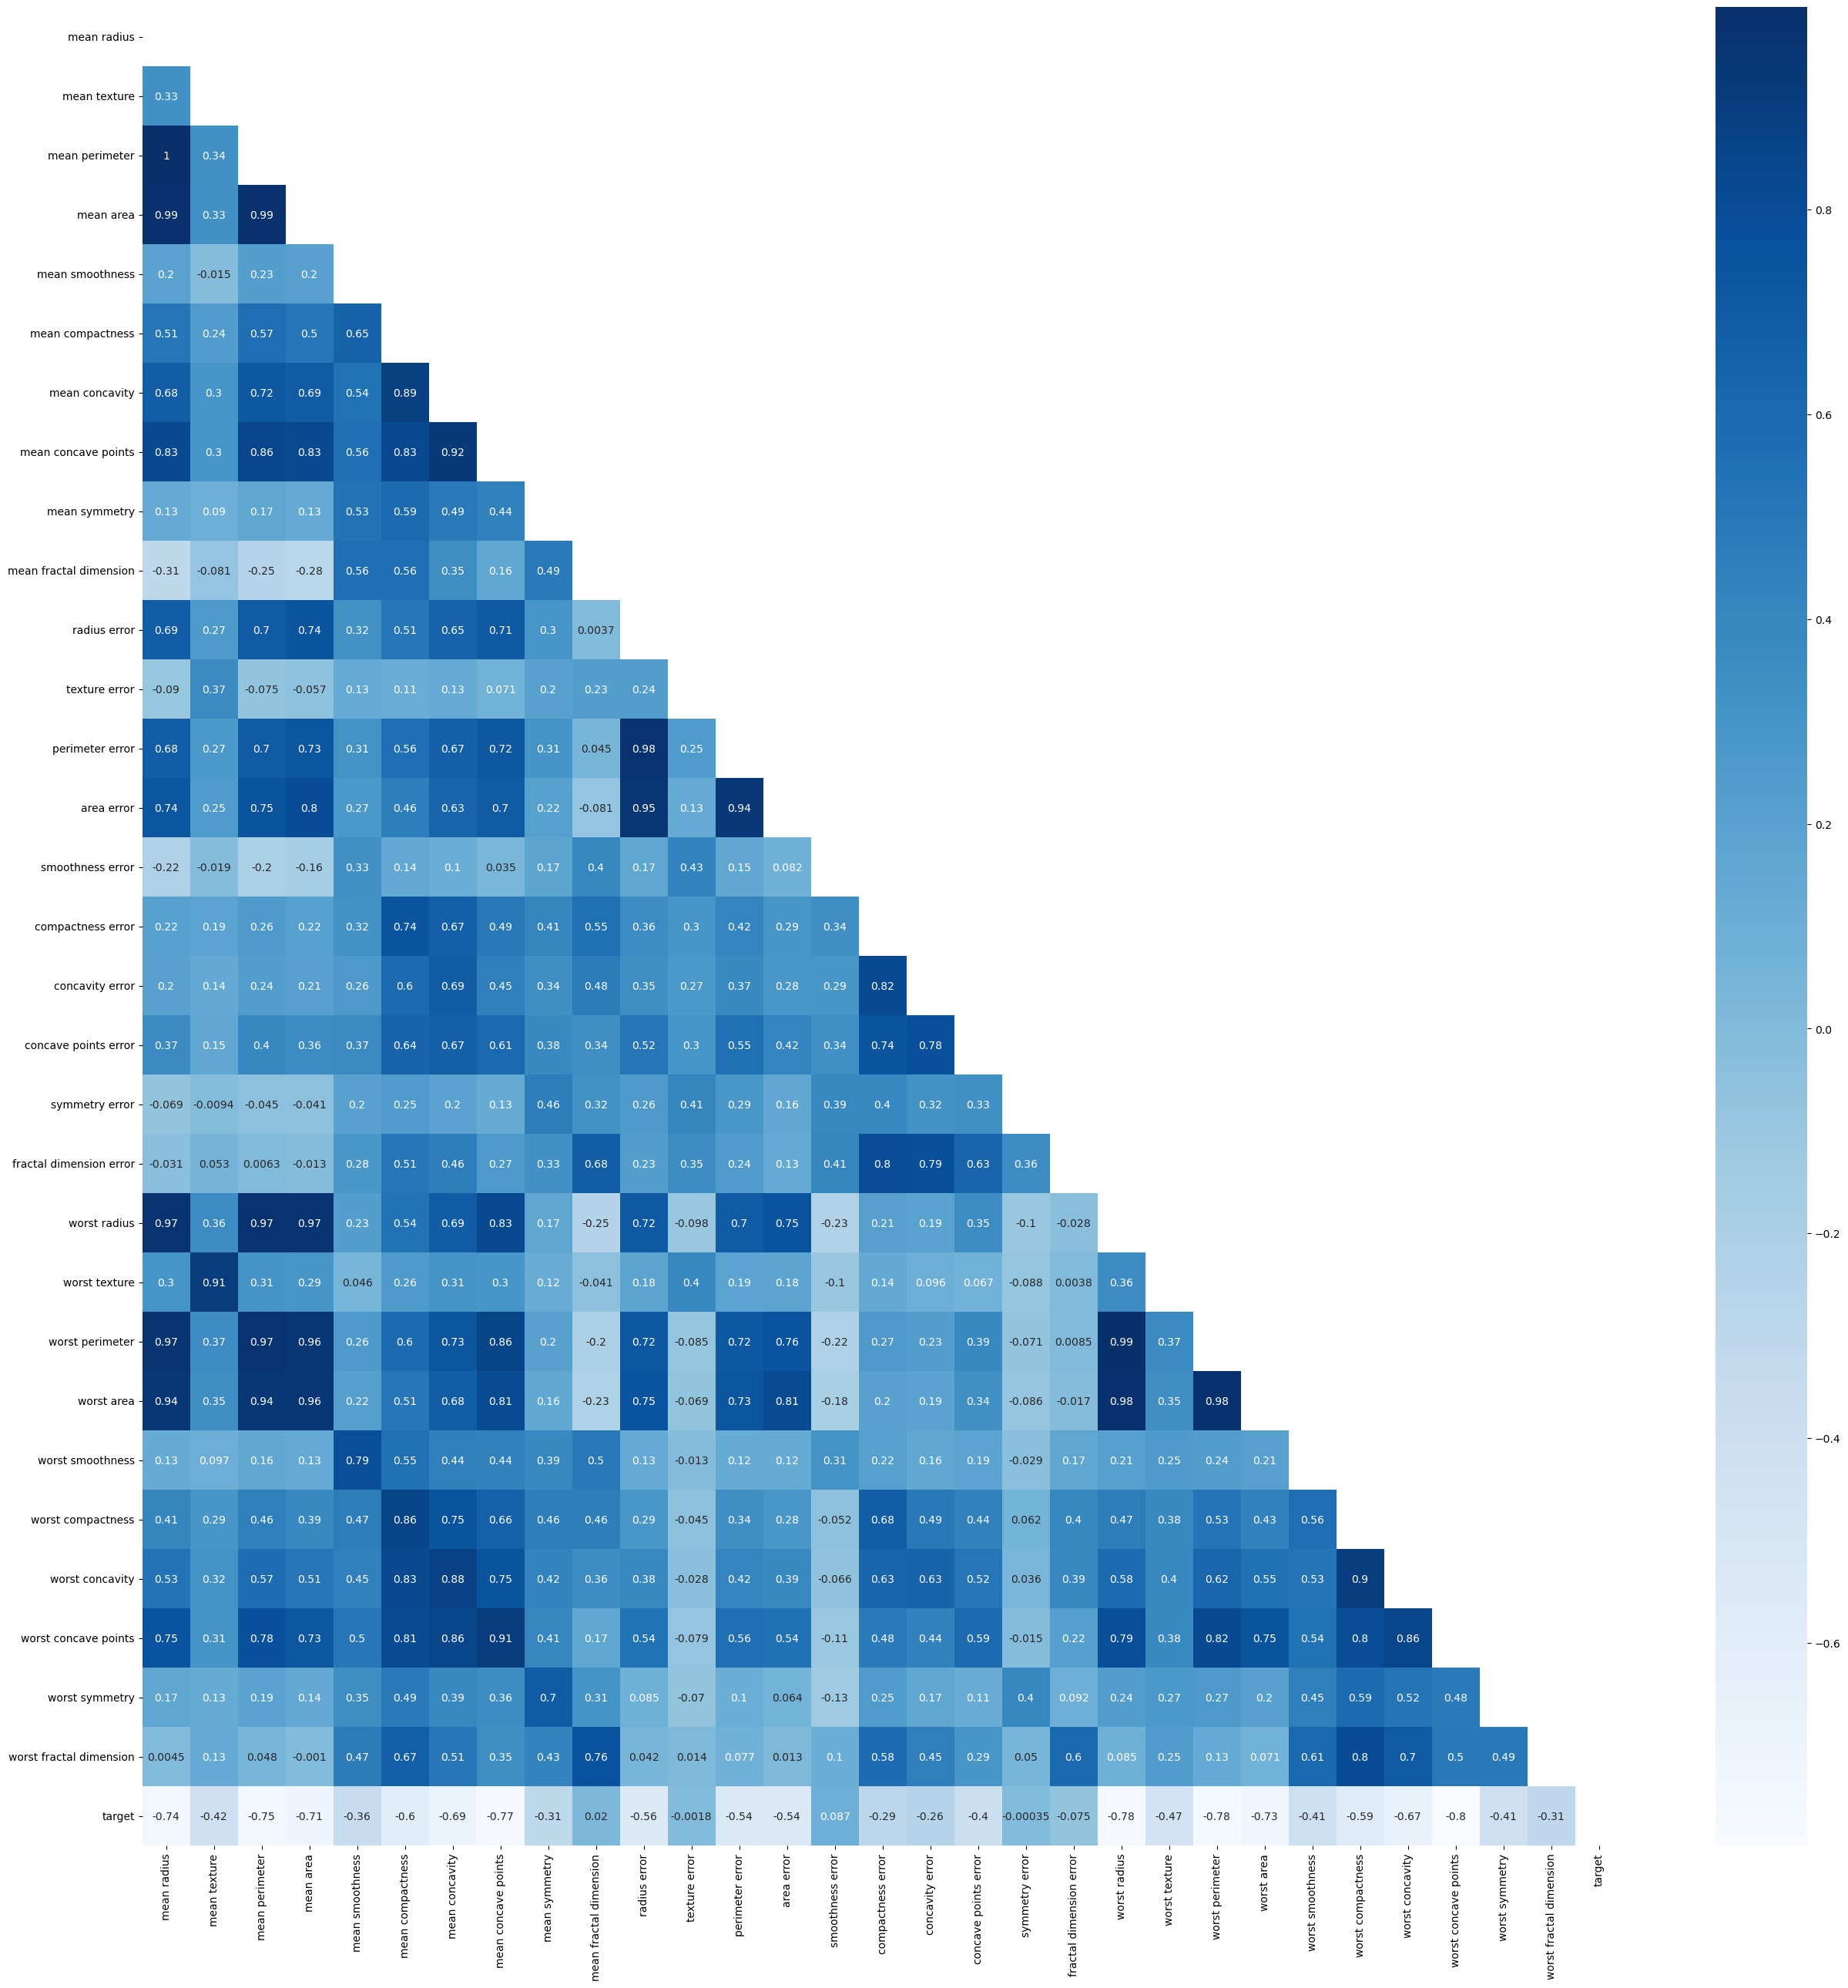

In [132]:
correlation_tri_heatmap(raw_train_set)

#### In this stage we will check for outliers
Since the data is clean now we need to check if outliers are exists. let's visualize it by disterbution plots, and box plots

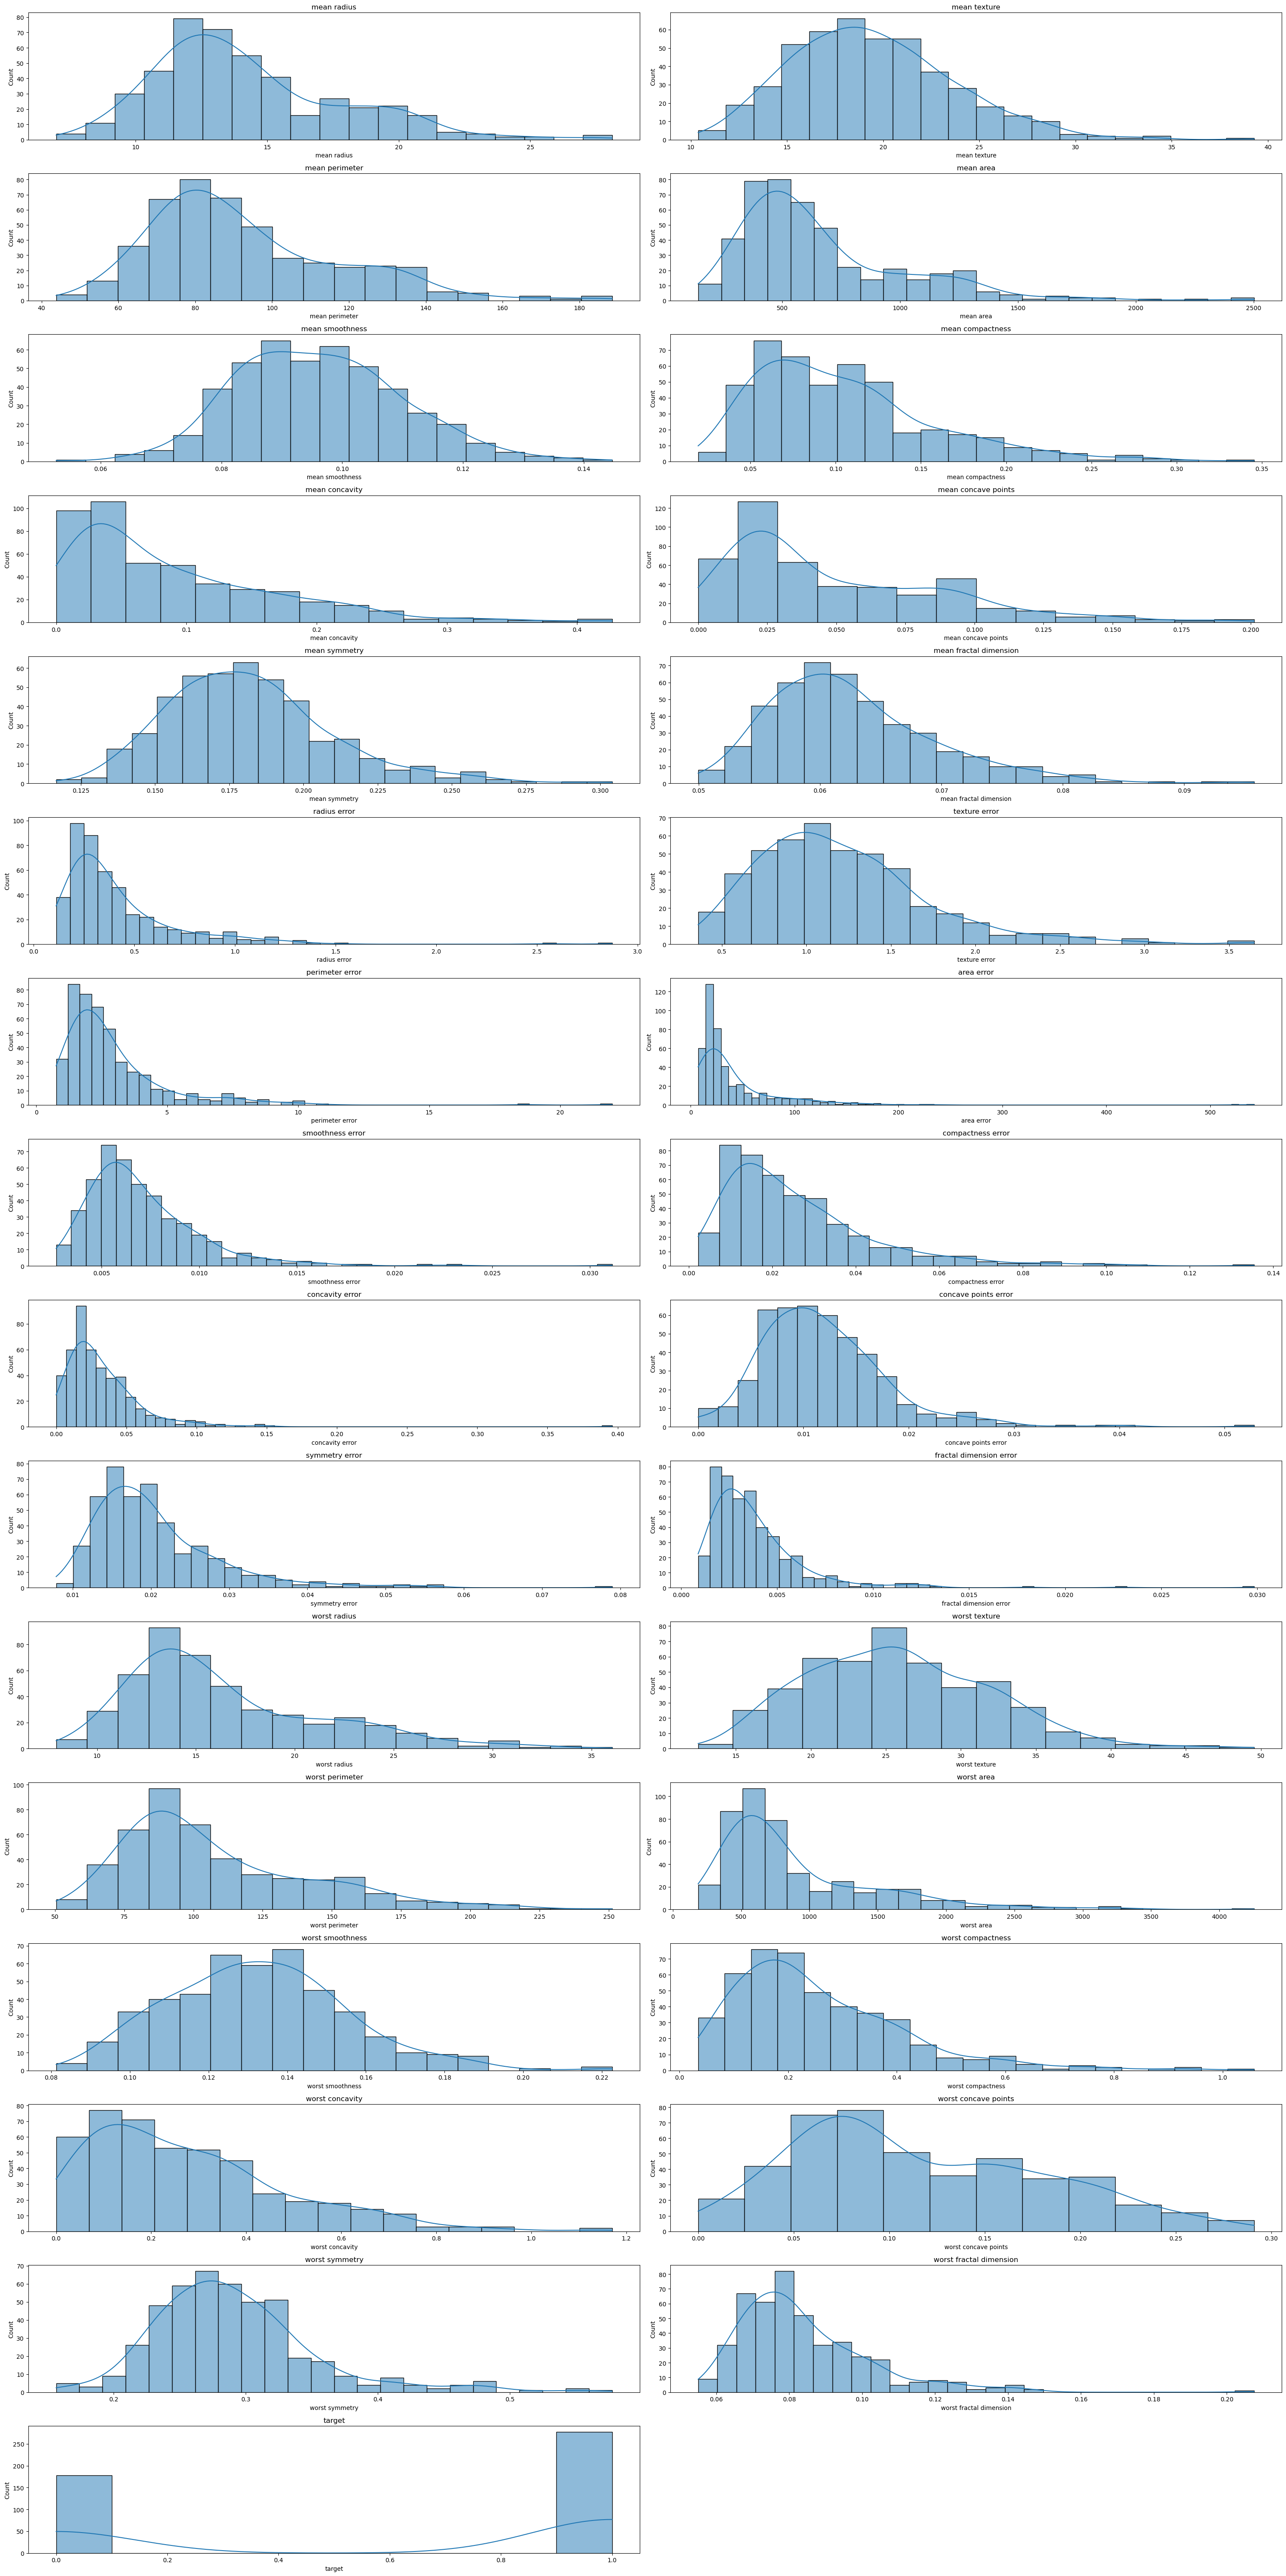

In [133]:
# A Utillty function for distrebution plot
def disterbution_plot(data_frame: pd.DataFrame, fig_size: tuple):
    plt.figure(figsize=fig_size)
    num_cols = data_frame.columns.size
    for i, column in enumerate(data_frame.columns):
        plt.subplot((num_cols +2 -1) // 2, 2, i+1)
        sns.histplot(data_frame[column], kde=True)
        plt.title(column)
    plt.tight_layout()
    plt.show()

disterbution_plot(raw_train_set,(30,60))

Now it's time for the box plot

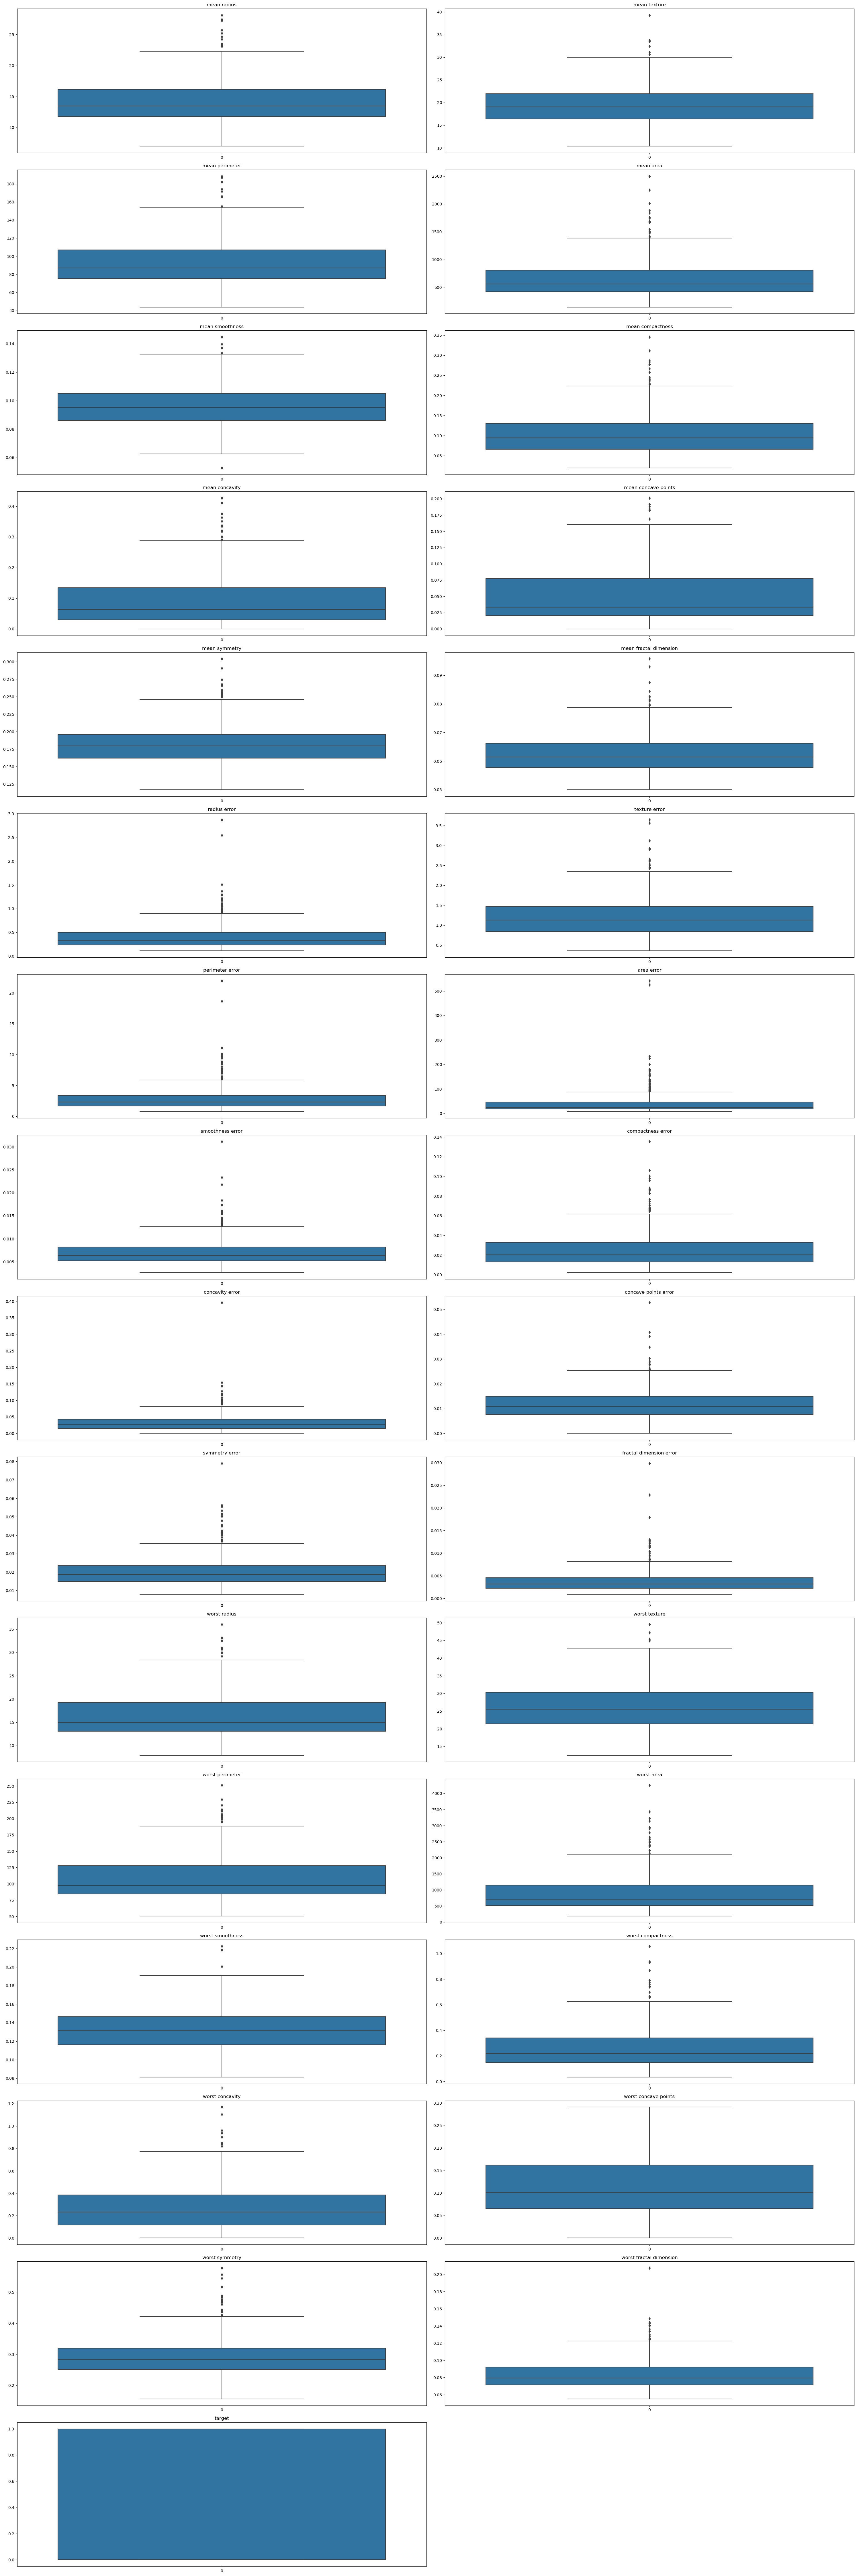

In [134]:
def datframe_box_plot(data_frame: pd.DataFrame, fig_size: tuple):
    plt.figure(figsize=fig_size)
    num_cols = data_frame.columns.size
    for i, column in enumerate(data_frame.columns):
        plt.subplot((num_cols +2 -1) // 2, 2, i+1)
        sns.boxplot(data_frame[column])
        plt.title(column)
    plt.tight_layout()
    plt.show()

datframe_box_plot(raw_train_set,(30,90))

#### Cocludions
We can see that there are some high correlate valuse and a reletevily a lot of features and a lot of outliers - meaning noise.
A good practice to deal with this situation is implementing PCA in order to reduce the dimention of the fetures and ignoring the noise.


## Feature Engineering

### PCA - Principal Component Analysis
PCA tends to loose data, before proceeding let's found how much we loose depending on the component's hyperparameter

In this stage we will 

PCA(n_components=30)

([<matplotlib.axis.XTick at 0x2799239e830>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29')])

Text(0.5, 0, 'Number of features')

Text(0, 0.5, 'Variance')

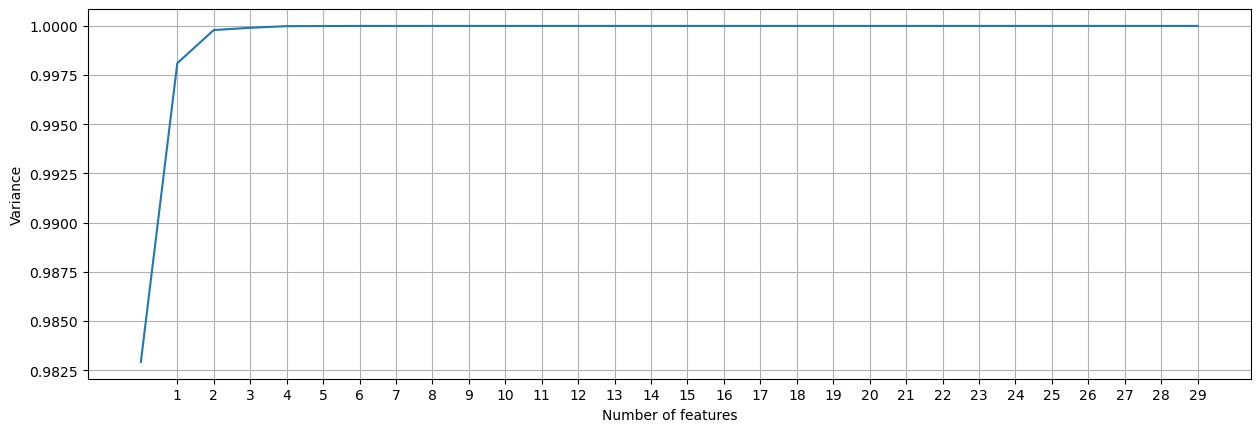

In [135]:
pca_eval = PCA(n_components=30)
pca_eval.fit(raw_train_set.drop('target', axis=1))
plt.figure().set_figwidth(15)
plt.plot(np.cumsum(pca_eval.explained_variance_ratio_))
plt.xticks(np.arange(1,30,1))
plt.xlabel("Number of features")
plt.ylabel("Variance")
plt.grid()

We can see that with only 2 features only we still have the majority of the data. Lets adopt this PCA with 2 features.
<p>But first let's devide our data to X and Y</p>

In [136]:
TARGET_COL = 'target'
Y_train_set = raw_train_set[TARGET_COL]
X_train_set = raw_train_set.drop(TARGET_COL, axis=1)

Y_test_set = raw_test_set[TARGET_COL]
X_test_set = raw_test_set.drop(TARGET_COL, axis =1)

print("Train set without target set:")
X_train_set.head()
X_train_set.shape

print("Train's set target set:")
Y_train_set.head()
Y_train_set.shape

print("Test set without target set:")
X_test_set.head()
X_test_set.shape

print("Test's set target set:")
Y_test_set.head()
Y_test_set.shape

PCA_COMPONENETS = 2

pca = PCA(n_components=PCA_COMPONENETS)
principal_components = pca.fit_transform(X_train_set)

pcaDF = pd.DataFrame(data=principal_components, columns=['PC1','PC2'])

pcaDF.head()
pcaDF.shape


Train set without target set:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.670,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,11.140,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,23.680,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,9.414,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,20.380,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225


(455, 30)

Train's set target set:


0    0
1    1
2    0
3    1
4    0
Name: target, dtype: int64

(455,)

Test set without target set:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,16.970,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,16.760,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,22.660,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,13.860,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834


(114, 30)

Test's set target set:


0    1
1    1
2    0
3    1
4    1
Name: target, dtype: int64

(114,)

,PC1,PC2
0,-193.121798,-40.665845
1,-641.318944,-57.757387
2,983.377020,87.039714
3,-763.061603,-35.697310
4,498.969014,74.137789


(455, 2)

## Traning
<p>In this section we will train our model using 2 algorithems: KNN and Naive Bayes.</p>
<p>In eatch algorithem we will test the best hyper-parameters using grid search cross validation</p>

### KNN

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 

knn_classifier = KNeighborsClassifier()
knn_params = {
      'n_neighbors': [3, 5, 7, 9, 15],
      'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(knn_classifier,knn_params,cv=5, scoring='f1')

knn_grid_search_res = knn_grid.fit(pcaDF, Y_train_set)
'best_params:'
knn_grid_search_res.best_params_
'best accuracy score:'
knn_grid_search_res.best_score_
'average mean(cross-validation) accuracy:'
knn_grid_search_res.cv_results_['mean_test_score'].mean()
'average std(cross-validation) accuracy:'
knn_grid_search_res.cv_results_['std_test_score'].mean()

'best_params:'

{'metric': 'manhattan', 'n_neighbors': 9}

'best accuracy score:'

0.9488808242698402

'average mean(cross-validation) accuracy:'

0.9406462247081739

'average std(cross-validation) accuracy:'

0.01012083148064098

In [138]:
knn_Results_df = pd.DataFrame(knn_grid_search_res.cv_results_)
knn_Results_df["Algo"] = 'KNN' 
knn_Results_df
knn_Results_df.shape

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,Algo
0,0.004770,0.006588,0.000000,0.000000,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.927273,0.920354,0.938053,0.929825,0.929825,0.929066,0.005675,10,KNN
1,0.000416,0.000831,0.004565,0.004997,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.928571,0.929825,0.938053,0.947368,0.948276,0.938419,0.008345,8,KNN
2,0.000202,0.000404,0.003327,0.005399,euclidean,7,"{'metric': 'euclidean', 'n_neighbors': 7}",0.929825,0.963636,0.920354,0.947368,0.956522,0.943541,0.016203,5,KNN
3,0.000105,0.000209,0.003121,0.006242,euclidean,9,"{'metric': 'euclidean', 'n_neighbors': 9}",0.954955,0.946429,0.920354,0.947368,0.956522,0.945126,0.013014,3,KNN
4,0.000000,0.000000,0.003021,0.006043,euclidean,15,"{'metric': 'euclidean', 'n_neighbors': 15}",0.964286,0.929825,0.931034,0.939130,0.948276,0.942510,0.012739,6,KNN
5,0.000000,0.000000,0.003148,0.006296,manhattan,3,"{'metric': 'manhattan', 'n_neighbors': 3}",0.920354,0.928571,0.938053,0.920354,0.939130,0.929293,0.008171,9,KNN
6,0.001221,0.002442,0.002022,0.004044,manhattan,5,"{'metric': 'manhattan', 'n_neighbors': 5}",0.938053,0.938053,0.929825,0.939130,0.948276,0.938667,0.005856,7,KNN
7,0.000000,0.000000,0.003146,0.006293,manhattan,7,"{'metric': 'manhattan', 'n_neighbors': 7}",0.946429,0.963636,0.920354,0.947368,0.956522,0.946862,0.014682,2,KNN
8,0.000000,0.000000,0.003108,0.006215,manhattan,9,"{'metric': 'manhattan', 'n_neighbors': 9}",0.946429,0.954955,0.939130,0.947368,0.956522,0.948881,0.006303,1,KNN
9,0.000000,0.000000,0.003123,0.006246,manhattan,15,"{'metric': 'manhattan', 'n_neighbors': 15}",0.955752,0.938053,0.931034,0.939130,0.956522,0.944098,0.010218,4,KNN


(10, 16)

### Naive Bayes

In [139]:
from sklearn.naive_bayes import GaussianNB

gnb_classifier = GaussianNB()
gnb_params = {
    'priors': [None, [0.1,]* 2,],
    'var_smoothing': [ 1e-3, 1e-6, 1e-9, 1e-12],
}

gnb_grid = GridSearchCV(gnb_classifier, gnb_params, cv=5, scoring='f1')

gnb_grid_search_res = gnb_grid.fit(pcaDF, Y_train_set)
'best_params:'
gnb_grid_search_res.best_params_
'best accuracy score:'
gnb_grid_search_res.best_score_


'best_params:'

{'priors': None, 'var_smoothing': 0.001}

'best accuracy score:'

0.9252304490038655

In [140]:
gnb_Results_df = pd.DataFrame(gnb_grid_search_res.cv_results_)
gnb_Results_df["Algo"] = 'GaussianNB' 
gnb_Results_df
gnb_Results_df.shape

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_priors,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,Algo
0,0.001973,0.003946,0.000124,0.000247,None,0.001,"{'priors': None, 'var_smoothing': 0.001}",0.932203,0.915254,0.929825,0.916667,0.932203,0.925230,0.007632,1,GaussianNB
1,0.000000,0.000000,0.003112,0.006225,None,0.000001,"{'priors': None, 'var_smoothing': 1e-06}",0.913793,0.905983,0.929825,0.924370,0.940171,0.922828,0.011979,2,GaussianNB
2,0.003706,0.005947,0.000674,0.000675,None,0.0,"{'priors': None, 'var_smoothing': 1e-09}",0.913793,0.905983,0.929825,0.924370,0.940171,0.922828,0.011979,2,GaussianNB
3,0.000000,0.000000,0.002170,0.003226,None,0.0,"{'priors': None, 'var_smoothing': 1e-12}",0.913793,0.905983,0.929825,0.924370,0.940171,0.922828,0.011979,2,GaussianNB
4,0.000521,0.000666,0.000000,0.000000,"[0.1, 0.1]",0.001,"{'priors': [0.1, 0.1], 'var_smoothing': 0.001}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,GaussianNB
5,0.000000,0.000000,0.000000,0.000000,"[0.1, 0.1]",0.000001,"{'priors': [0.1, 0.1], 'var_smoothing': 1e-06}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,GaussianNB
6,0.002856,0.005173,0.000000,0.000000,"[0.1, 0.1]",0.0,"{'priors': [0.1, 0.1], 'var_smoothing': 1e-09}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,GaussianNB
7,0.000000,0.000000,0.000000,0.000000,"[0.1, 0.1]",0.0,"{'priors': [0.1, 0.1], 'var_smoothing': 1e-12}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,GaussianNB


(8, 16)

Hyper-partametes, algorithems comparisson Dataframe

In [141]:
results_DF = pd.concat([knn_Results_df, gnb_Results_df], axis=0)
results_DF_clean = results_DF[["Algo","params","split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score"]].reset_index(drop=True)
results_DF_clean

,Algo,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,KNN,"{'metric': 'euclidean', 'n_neighbors': 3}",0.927273,0.920354,0.938053,0.929825,0.929825
1,KNN,"{'metric': 'euclidean', 'n_neighbors': 5}",0.928571,0.929825,0.938053,0.947368,0.948276
2,KNN,"{'metric': 'euclidean', 'n_neighbors': 7}",0.929825,0.963636,0.920354,0.947368,0.956522
3,KNN,"{'metric': 'euclidean', 'n_neighbors': 9}",0.954955,0.946429,0.920354,0.947368,0.956522
4,KNN,"{'metric': 'euclidean', 'n_neighbors': 15}",0.964286,0.929825,0.931034,0.939130,0.948276
5,KNN,"{'metric': 'manhattan', 'n_neighbors': 3}",0.920354,0.928571,0.938053,0.920354,0.939130
6,KNN,"{'metric': 'manhattan', 'n_neighbors': 5}",0.938053,0.938053,0.929825,0.939130,0.948276
7,KNN,"{'metric': 'manhattan', 'n_neighbors': 7}",0.946429,0.963636,0.920354,0.947368,0.956522
8,KNN,"{'metric': 'manhattan', 'n_neighbors': 9}",0.946429,0.954955,0.939130,0.947368,0.956522
9,KNN,"{'metric': 'manhattan', 'n_neighbors': 15}",0.955752,0.938053,0.931034,0.939130,0.956522


### Concludions
<p>
We can see that the best hyperparameters are:
<ol>
<li>KNN - metric: 'manhattan', n_neighbors: 9</li>
<li>GNB - priors: None, var_smoothing: 0.001</li>
</ol>
And Knn hve the higest f1 score: 0.948
</p>
<p>But let's not forget to transform the test dataframe to the correct dimentions by using PCA</p>

In [142]:
principal_components_test = pca.fit_transform(X_test_set)

pca_testDF = pd.DataFrame(data=principal_components_test, columns=['PC1','PC2'])
pca_testDF.head()
pca_testDF.shape

,PC1,PC2
0,160.551047,-122.508828
1,91.976447,-11.524675
2,962.720577,5.070276
3,-679.387954,43.610968
4,-227.924140,-34.576847


(114, 2)

## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [143]:
clf =knn_grid.best_estimator_.fit(pcaDF, Y_train_set)

## Part 4 - Apply on test and show model performance estimation

Appling the model on the test set

In [144]:

Y_predict = knn_grid.best_estimator_.predict(pca_testDF)
cf = confusion_matrix(Y_test_set, Y_predict)

Model results:

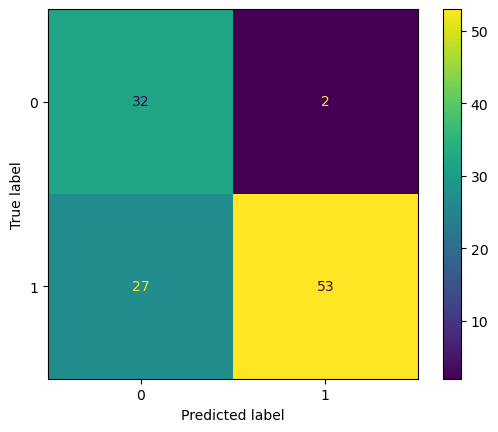

In [145]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display=ConfusionMatrixDisplay(confusion_matrix=cf)
cm_display.plot()


In [147]:
from sklearn import metrics
actual = Y_test_set
predicted = Y_predict
accuracy = accuracy_score(actual, predicted)
precision = metrics.precision_score(actual, predicted)
recall = metrics.recall_score(actual, predicted)
f1_score = metrics.f1_score(actual, predicted)

print(f'Accuracy:{accuracy}\nPrecision:{precision}\nRecall:{recall}\nF1_score:{f1_score}')


Accuracy:0.7456140350877193
Precision:0.9636363636363636
Recall:0.6625
F1_score:0.7851851851851853
